# Forecasting Automation for Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [1]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [2]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [3]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [4]:
## Here, we are using AMAZON stocks data
## Download it from Yahoo Finance -> Historical Data
## Similary, we can predict stocks for any company.

In [5]:
df = pd.read_csv('AMZN.csv')

In [6]:
#read_csv function from pandas

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000
1,2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3046.260010,3563500
2,2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3052.030029,3312900
3,2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,3075.729980,2746000
4,2021-03-30,3070.010010,3073.000000,3034.000000,3055.290039,3055.290039,2337600
...,...,...,...,...,...,...,...
249,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
250,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
251,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
252,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600


In [8]:
## Close Price column ---- Standard over the entire finance industry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,3319.296699,3355.487831,3280.856064,3317.448472,3317.448472,3.454030e+06
std,199.042844,195.026348,205.178665,200.719458,200.719458,1.413073e+06
min,2733.669922,2805.000000,2671.449951,2720.290039,2720.290039,1.680300e+06
25%,3212.382507,3248.737488,3196.260010,3223.842529,3223.842529,2.570175e+06
50%,3342.165039,3368.664917,3303.854981,3335.119995,3335.119995,3.182750e+06
75%,3451.909973,3483.157532,3412.632507,3447.789917,3447.789917,3.842425e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.267280e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [11]:
px.area(df, x='Date', y='Close')

In [12]:
px.line(df, x='Date', y='Close')

In [13]:
px.area(df, x='Date', y='Volume')

In [14]:
px.bar(df, y='Volume')

In [15]:
px.box(df, y='Close')

# Understanding Facebook Prophet

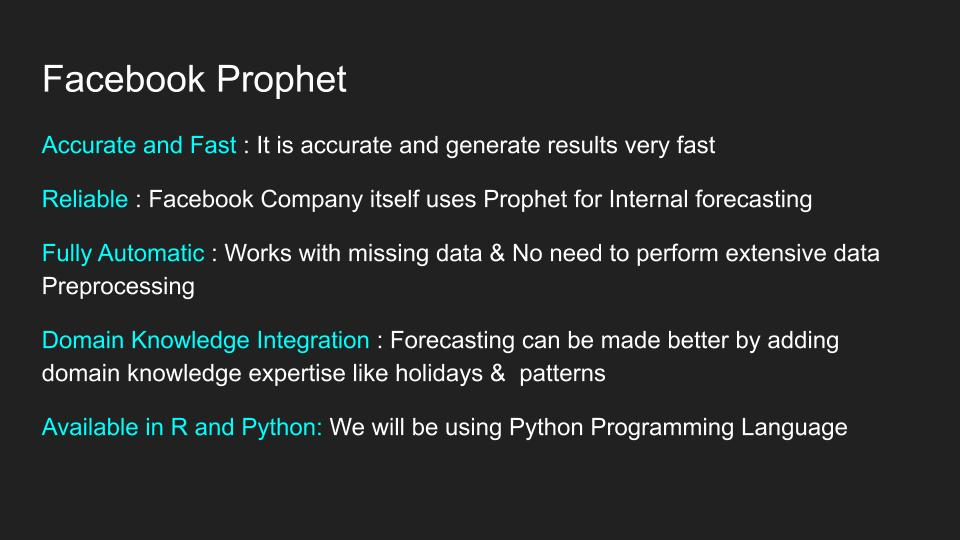

## Data Preperation

In [16]:
### create new df with Date and Close Price
columns = ['Date','Close']
ndf = pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2021-03-24,3087.070068
1,2021-03-25,3046.260010
2,2021-03-26,3052.030029
3,2021-03-29,3075.729980
4,2021-03-30,3055.290039
...,...,...
249,2022-03-18,3225.010010
250,2022-03-21,3229.830078
251,2022-03-22,3297.780029
252,2022-03-23,3268.159912


In [17]:
### Facebook Prophet doesn't understand Date and Close
### We need to rename the columns to ds and y respectively
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2021-03-24,3087.070068
1,2021-03-25,3046.260010
2,2021-03-26,3052.030029
3,2021-03-29,3075.729980
4,2021-03-30,3055.290039
...,...,...
249,2022-03-18,3225.010010
250,2022-03-21,3229.830078
251,2022-03-22,3297.780029
252,2022-03-23,3268.159912


## Creating Facebook Prophet Model

In [18]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [19]:
future = m.make_future_dataframe(periods=30) # future dataframe with prophet period 30 Days
forecast = m.predict(future) # make prediction from future dataframe

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-24,3190.487126,3034.872285,3390.768797,3190.487126,3190.487126,24.372998,24.372998,24.372998,24.372998,24.372998,24.372998,0.0,0.0,0.0,3214.860123
1,2021-03-25,3192.632018,3052.241187,3384.818466,3192.632018,3192.632018,23.731278,23.731278,23.731278,23.731278,23.731278,23.731278,0.0,0.0,0.0,3216.363295
2,2021-03-26,3194.776909,3035.387483,3388.684628,3194.776909,3194.776909,17.417362,17.417362,17.417362,17.417362,17.417362,17.417362,0.0,0.0,0.0,3212.194271
3,2021-03-29,3201.211585,3037.309683,3383.053714,3201.211585,3201.211585,15.795904,15.795904,15.795904,15.795904,15.795904,15.795904,0.0,0.0,0.0,3217.007489
4,2021-03-30,3203.356477,3051.850196,3410.556140,3203.356477,3203.356477,24.877911,24.877911,24.877911,24.877911,24.877911,24.877911,0.0,0.0,0.0,3228.234388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2022-04-19,2809.986100,2657.026689,3006.777767,2802.563560,2818.417511,24.877911,24.877911,24.877911,24.877911,24.877911,24.877911,0.0,0.0,0.0,2834.864011
280,2022-04-20,2805.857176,2650.761977,3004.153754,2798.095255,2814.884944,24.372998,24.372998,24.372998,24.372998,24.372998,24.372998,0.0,0.0,0.0,2830.230174
281,2022-04-21,2801.728252,2660.943692,2996.273227,2793.403812,2811.334753,23.731278,23.731278,23.731278,23.731278,23.731278,23.731278,0.0,0.0,0.0,2825.459530
282,2022-04-22,2797.599329,2644.252205,3003.172587,2788.508529,2807.586251,17.417362,17.417362,17.417362,17.417362,17.417362,17.417362,0.0,0.0,0.0,2815.016691


In [21]:
## yhat column is the most important --- predicted value

In [22]:
px.line(forecast, x='ds', y='yhat')

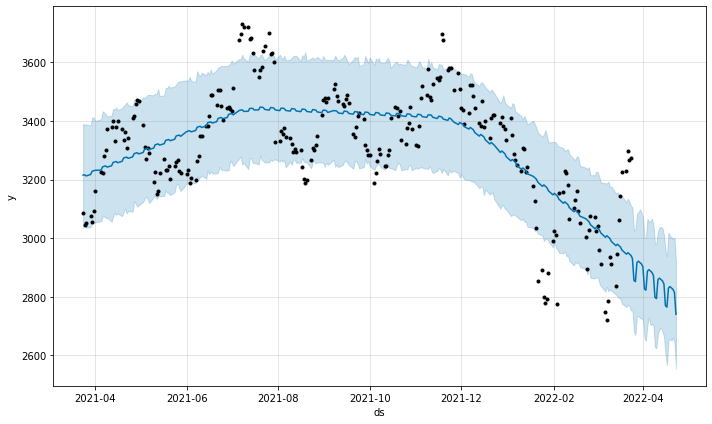

In [23]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

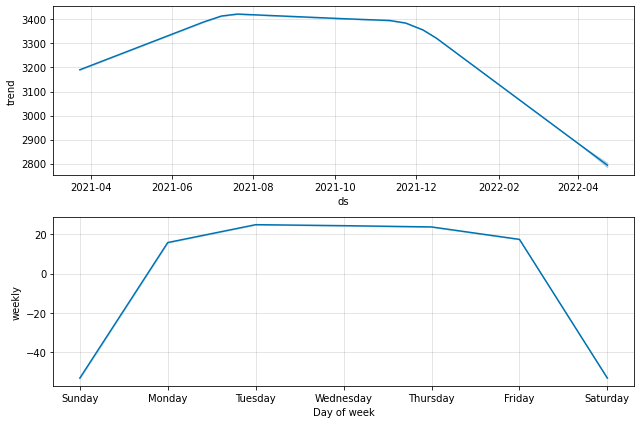

In [24]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [25]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>